In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
import xlsxwriter 
%matplotlib inline
import import_ipynb
import function_NGD_20201022
import random
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300

importing Jupyter notebook from function_NGD_20201022.ipynb


## new NGD circuit

In [2]:
# def NGD_new(x,alpha,beta,K,g,phi):
#     y=np.zeros(len(X))
#     z=np.zeros(len(x))

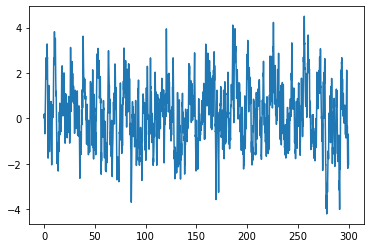

In [3]:
aaa=np.random.normal(0,1,30000-1)
T,x=function_NGD_20201022.OU(300,1,3,0.01)
plt.plot(T,x)

## HMM input checking result

(100, 120)

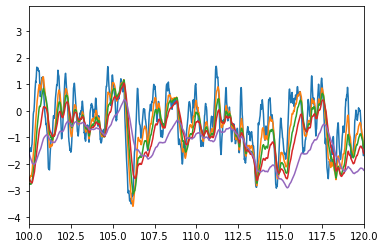

In [4]:
# HMM input
G_set=[20,10,7,5,2.5]
x_set=[[] for i in range(len(G_set))]
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
mu, sigma = 0, 1
seed=np.random.normal(mu, sigma, len(T))
for n in range(len(G_set)):
    w = G_set[n]/(2*1.06)
    D=4
    L=np.zeros(len(T))
    V=np.zeros(len(T))
    for i in range(len(T)-1):
        L[i+1]=L[i]+V[i]*dt
        V[i+1]=(1-G_set[n]*dt)*V[i]-w**2*L[i]*dt+math.sqrt(D*dt)*seed[i]
    x_set[n]=L/np.std(L)
    plt.plot(T,x_set[n])
plt.xlim(100,120)

In [5]:
alpha,beta,K,g=10,2,30,10
y_set=[function_NGD_20201022.NGD(x_set[i],dt,alpha,beta,K,g,1)[0] for i in range(len(x_set))]
z_set=[function_NGD_20201022.NGD(x_set[i],dt,alpha,beta,K,g,1)[1] for i in range(len(x_set))]
ts_MI_set=[function_NGD_20201022.MI(function_NGD_20201022.EqualState(x_set[i],8),\
                                    function_NGD_20201022.EqualState(y_set[i],8),dt,[-2,2]) for i in range(len(x_set))]

(-1, 1)

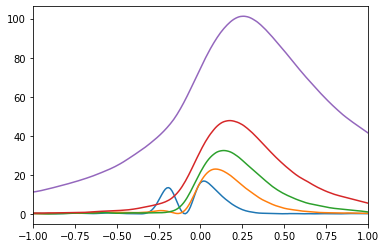

In [6]:
for i in range(len(x_set)):
    plt.plot(ts_MI_set[0][0],ts_MI_set[i][1])
plt.xlim(-1,1)

[0.6        0.64444444 0.68888889 0.73333333 0.77777778 0.82222222
 0.86666667 0.91111111 0.95555556 1.        ]


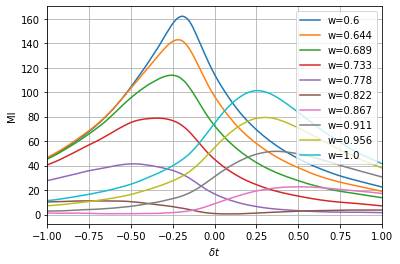

In [7]:
wy=np.linspace(0.6,1,10)
print(wy)
# wy=[]
x=x_set[4]
y=y_set[4]
z=z_set[4]
B=[wy[k]*y-(1-wy[k])*z for k in range(len(wy))]
MIxyz=[[] for i in range(len(B))]
for k in range(len(B)):
    tsxyz,MIxyz[k]=function_NGD_20201022.MI(function_NGD_20201022.EqualState(x,8),\
                                            function_NGD_20201022.EqualState(B[k],8),dt,[-2,2])
for i in range(len(B)):
    plt.plot(tsxyz,MIxyz[i],label='w='+str(round(wy[i],3)))
plt.legend()
plt.xlabel('$\delta t$')
plt.ylabel('MI')
plt.xlim(-1,1)
plt.grid()

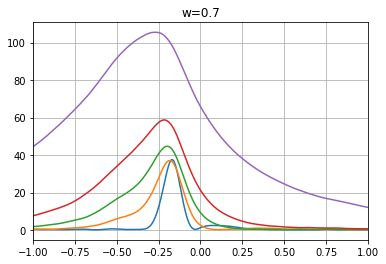

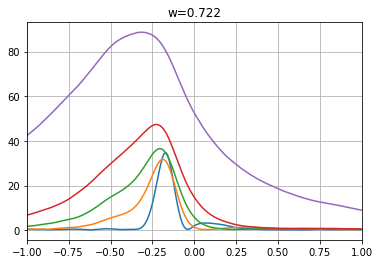

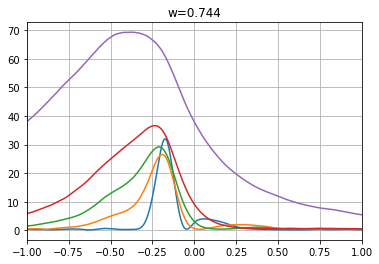

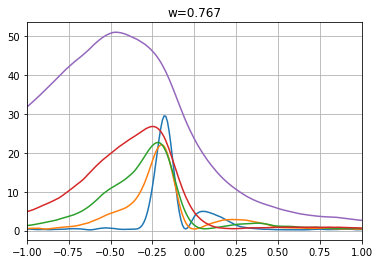

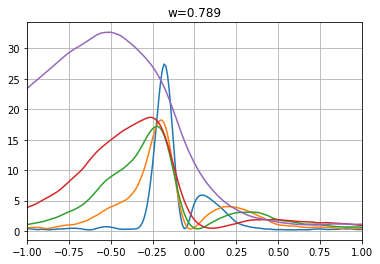

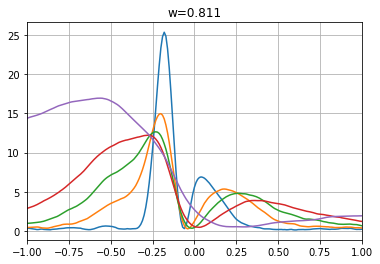

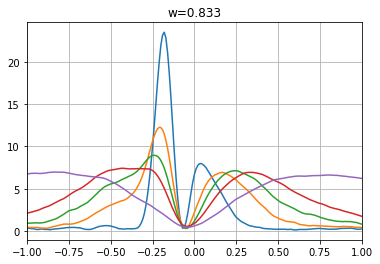

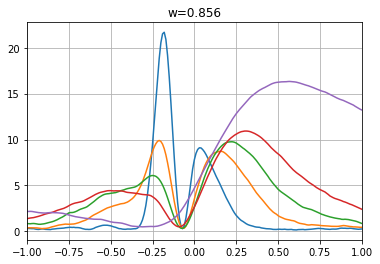

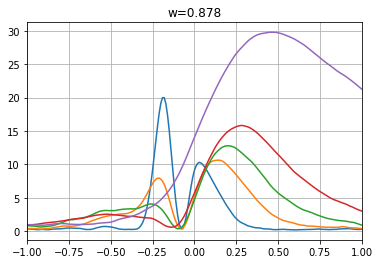

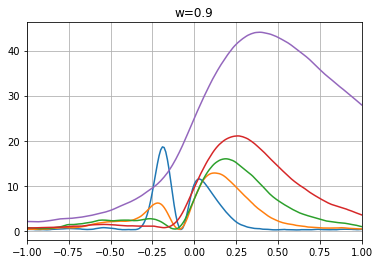

In [8]:
wy_set=np.linspace(0.7,0.9,10)
for nw in range(len(wy_set)):
    wy=wy_set[nw]
    B_G=[wy*y_set[iG]-(1-wy)*z_set[iG] for iG in range(len(x_set))]
    MIxyz_G=[[] for i in range(len(B_G))]
    for k in range(len(B_G)):
        tsxyz,MIxyz_G[k]=function_NGD_20201022.MI(function_NGD_20201022.EqualState(x_set[k],8),\
                                                   function_NGD_20201022.EqualState(B_G[k],8),dt,[-1,1])
    plt.figure()
    for i in range(len(B_G)):
        plt.plot(tsxyz,MIxyz_G[i])
        plt.title('w='+str(round(wy_set[nw],3)))
    plt.xlim(-1,1)
    plt.grid()